## Mnist using Tensorflow

### Process 
+ Each nuron does the weighted sum of its inputs + Bias
+ 9 neurons as there are 9 values
+ After doing the whole process, we normalize and that is done using the softmax function
+ Use the Softmax function as that is the best function
+ 28x28 pixel image = 784 pixels
+ Instead of One one we do the weighted sum of all the 100 images 
+ weights are the degree of freedom
+ Adding the biases are tough, but we can do it using numpy addition
+ Line by line calculation of the prediction output using softmax function, at the end we get 10 values, ie, output of each neuron, so out output should be a matrix of size [100,10]
+ This will only work if weights and biased are good
+ Supervised learning, we have a batch of handwritten digits which are alredy labelled, we have a system which predicts, we would need to define a metric to characterize the system
+ Cross entropy is a good measure to calculate the error, others can be euclidean disctance, cosine distance , RMS error etc..

+ Now that we have the distance we have to minimze it, and this is out goal, find the weights and biases that minimized the distance
+ Learning rate is the small steps to take to go in the right direction to reach the bottom or the point of least distance

In [18]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

X=tf.placeholder(tf.float32, [None, 784]) #gray scale so 1 value for pixel
W=tf.Variable(tf.zeros([784, 10]))
b=tf.Variable(tf.zeros([10]))

init=tf.global_variables_initializer()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
#model
Y=tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)

#placeholder for known labels
Y_=tf.placeholder(tf.float32, [None, 10]) #one hot encoded

#loss function
cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))

In [20]:
#correct answers
is_correct=tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))

## Gradient Optimizer

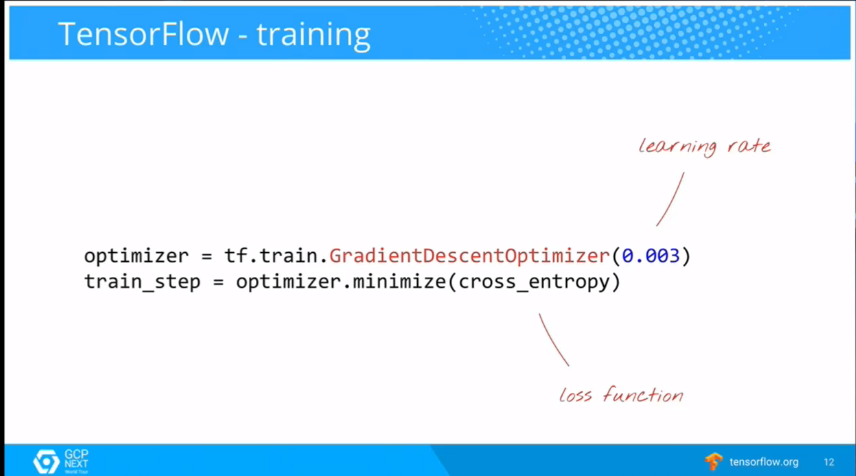

In [26]:
optimizer=tf.train.GradientDescentOptimizer(0.003)
train_step=optimizer.minimize(cross_entropy)

In [27]:
# Run TF
sess=tf.Session()
sess.run(init)
for i in range(10000):
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data = {X:batch_X, Y_:batch_Y}
    
    #train
    sess.run(train_step, feed_dict=train_data) # Run
    
    #success on training data
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
    if i%100==0:print("Completed iterations = {}, accuracy = {}".format(i,a*100))
    
    #On the test data
    test_data={X:mnist.test.images, Y_:mnist.test.labels}
    at,ct = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    if i%100==0:print("Completed iterations = {}, accuracy = {}".format(i,at*100))

Completed iterations = 0, accuracy = 23.999999463558197
Completed iterations = 0, accuracy = 9.640000015497208
Completed iterations = 100, accuracy = 87.99999952316284
Completed iterations = 100, accuracy = 88.31999897956848
Completed iterations = 200, accuracy = 87.99999952316284
Completed iterations = 200, accuracy = 90.45000076293945
Completed iterations = 300, accuracy = 91.00000262260437
Completed iterations = 300, accuracy = 90.65999984741211
Completed iterations = 400, accuracy = 88.99999856948853
Completed iterations = 400, accuracy = 91.01999998092651
Completed iterations = 500, accuracy = 94.9999988079071
Completed iterations = 500, accuracy = 91.14000201225281
Completed iterations = 600, accuracy = 87.00000047683716
Completed iterations = 600, accuracy = 91.28000140190125
Completed iterations = 700, accuracy = 93.00000071525574
Completed iterations = 700, accuracy = 91.6100025177002
Completed iterations = 800, accuracy = 94.9999988079071
Completed iterations = 800, accuracy 

Completed iterations = 7200, accuracy = 93.99999976158142
Completed iterations = 7200, accuracy = 92.43999719619751
Completed iterations = 7300, accuracy = 89.99999761581421
Completed iterations = 7300, accuracy = 92.36999750137329
Completed iterations = 7400, accuracy = 91.00000262260437
Completed iterations = 7400, accuracy = 92.330002784729
Completed iterations = 7500, accuracy = 93.99999976158142
Completed iterations = 7500, accuracy = 92.61999726295471
Completed iterations = 7600, accuracy = 93.00000071525574
Completed iterations = 7600, accuracy = 92.39000082015991
Completed iterations = 7700, accuracy = 92.00000166893005
Completed iterations = 7700, accuracy = 92.41999983787537
Completed iterations = 7800, accuracy = 97.00000286102295
Completed iterations = 7800, accuracy = 92.23999977111816
Completed iterations = 7900, accuracy = 95.99999785423279
Completed iterations = 7900, accuracy = 92.3799991607666
Completed iterations = 8000, accuracy = 91.00000262260437
Completed iterati

# Plotting the accuracy and the cross entropy through Tensorboard
+ https://stackoverflow.com/questions/40146428/show-training-and-validation-accuracy-in-tensorflow-using-same-graph?noredirect=1&lq=1
+ Why Mini-batch of 100
    + That is Because we want to run it on GPU, distributed computation is possible to work in case of batch processing
    + with 1 image, we might get to the local minima, but that will be windy, it is more stable to do this with 100 images at one time, which is way more stable as we get an idea of the gradient by going through 100 images
+ Let's go deep, with Deep Neural Networks
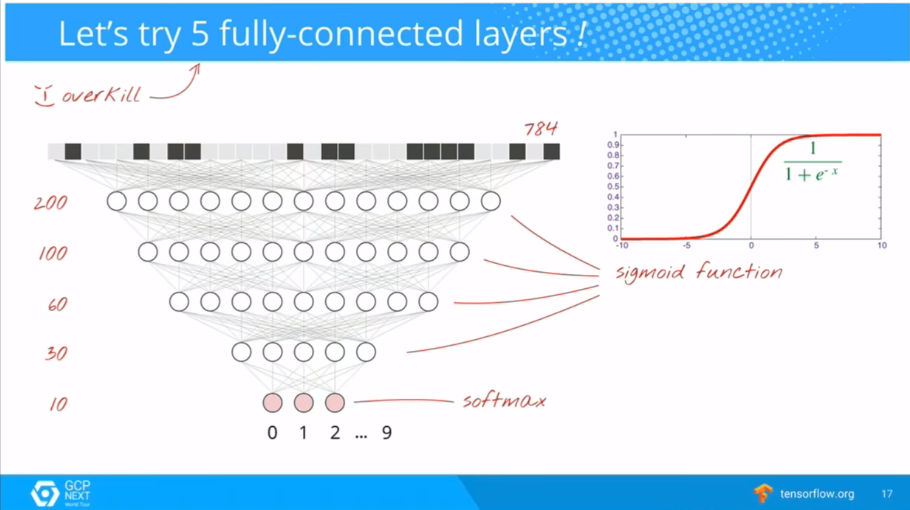